# MOVIES ANALYSIS WITH EDA

## BUSINESS UNDERSTANDING
### What factors should Microsoft consider when starting a Movie Studio?
Microsoft has decided to start a new Movie Studio. In order to do this they need to know the kinds of movies that are doing the best.This will help to know the type of films that microsoft should produce.EDA should be done so as to provide concrete recommendations to Microsoft. The following are the questions we are going to answer;
* What are the most produced genres?
* What is the mean budget per genre?
* What is the relationship between budget allocated and the gross profit?

## Data Understanding

The data for this analysis comes from;
* ```im.db```: 
This is a SQLite database that consists of data about movies from IMDB. The data consists of 8 tables. For this analysis I will only use 2 tables i.e. ```movie_basics``` and ```movie_ratings``` table.

*  ```bom.movie_gross.csv```: 
This is a csv file that contains data about movies from Box Office. 

* ```tn.movie_budgets.csv```: 
This is a csv file that shows the budgets allocated to each movie and the income generated from the movie.

## Importing Libraries

In [101]:
import numpy as np

#for analysis and manipulation of data
import pandas as pd

#for connecting to im.db
import sqlite3 

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [102]:
# connecting to im.db database
conn = sqlite3.connect("im.db")

In [103]:
#load the bom data
bom_df = pd.read_csv("bom.movie_gross.csv")

In [104]:
#load movie_budgets data
moviebudgets_df = pd.read_csv("tn.movie_budgets.csv")

## Data Understanding (Box Office)

In [105]:
# preview of first 5 rows
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [106]:
# preview of the last rows
bom_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [107]:
# Number of rows and columns
bom_df.shape

(3387, 5)

In [108]:
#Statistical summary of data
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [109]:
# information about the columns
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


This is what we get from the above information;
* Box Office data has 5 columns namely ```title```, ```studio```, ```domestic_gross```, ```foreign_gross``` and ```year```. 
* ```title```, ```studio``` and ```foreign_gross``` columns are string ojects while ```domestic_gross``` and ```year``` are numerical objects.
* The data has a total of 3387 rows.
* The following columns have null values because they don't have all 3387 rows;
    * studio
    * domestic_gross
    * foreign_gross

## Data Cleaning(Box Office)


In [110]:
# number of rows with null values
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [111]:
# sample rows where foreign_gross has no missing values
bom_df[bom_df["studio"].notna()].sample(5, random_state = 1)

,title,studio,domestic_gross,foreign_gross,year
571,Poetry,Kino,356000.0,1900000,2011
3343,The Third Murder,FM,89300.0,NaN,2018
1850,Camp X-Ray,IFC,13300.0,NaN,2014
3257,Don't Worry He Won't Get Far on Foot,Amazon,1400000.0,2500000,2018
1512,Non-Stop,Uni.,92200000.0,130600000,2014


In [112]:
# sample rows where foreign_gross has missing values
bom_df[bom_df["studio"].isna()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [113]:
# drop rows where studio has a null value
bom_df.dropna(subset = ["studio"], inplace = True)

In [114]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [115]:
# percentage of missing values in domestic_gross
bom_df["domestic_gross"].isnull().sum()/len(bom_df)*100

0.768775872264932

This is a very small portion of the dataset therefore we can just drop the rows with null values.

In [116]:
bom_df.dropna(subset = ["domestic_gross"], inplace = True)
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [117]:
# percentage of missing values in foreign gross
bom_df["foreign_gross"].isnull().sum()/len(bom_df)*100

40.19666269368295

This is a significant portion of the dataset therefore we cannot just drop the rows. We can fill the missing values with either the mean or median.

In [118]:
# preview of foreign gross column
bom_df["foreign_gross"].head()

0    652000000
1    691300000
2    664300000
3    535700000
4    513900000
Name: foreign_gross, dtype: object

Looks like the datatype of foreign gross is string. So we need to change the column to a numerical datatype.

In [119]:
# cleaning the column and converting to a numerical datatype
bom_df["foreign_gross"] = [float(str(i).replace(",", "")) for i in bom_df["foreign_gross"]]
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [120]:
# mean of foreign_gross column before filling null values
bom_df["foreign_gross"].mean().round(2)

75790384.84

In [121]:
#median of foreign_gross
bom_df["foreign_gross"].median()

19400000.0

In [122]:
#checking mean after filling null values with the mean
bom_df1 = bom_df["foreign_gross"].fillna(bom_df["foreign_gross"].mean())
bom_df1.mean().round(2)

75790384.84

In [123]:
#checking mean after filling null values with median
bom_df2 = bom_df["foreign_gross"].fillna(bom_df["foreign_gross"].median())
bom_df2.mean().round(2)

53123332.05

According to the above results, filling null values with the median is not a good option because it reduces the mean. So we will fill the null values with the mean because that  does not alter the mean.

In [124]:
# replacing null values with the mean
bom_df["foreign_gross"] = bom_df["foreign_gross"].fillna(bom_df["foreign_gross"].mean())
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [125]:
#confirming there are no missing values
bom_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Our dataset has no missing values, therefore we can check and see if there are any duplicates.

In [126]:
#checking for duplicates
bom_df.duplicated().any()

False

Our data has no duplicates. We can then check the summary statistics after data cleaning.

In [127]:
# summary statistics of bom_df
bom_df.describe()

,domestic_gross,foreign_gross,year
count,3.356000e+03,3.356000e+03,3356.000000
mean,2.877149e+07,7.579038e+07,2013.970203
std,6.700694e+07,1.068472e+08,2.479064
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,1.220000e+07,2012.000000
50%,1.400000e+06,7.579038e+07,2014.000000
75%,2.795000e+07,7.579038e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


Now that we've cleaned the Box Office dataset, we can go ahead and clean the movie budgets dataset.

## Data Understanding (Movie Budgets)

In [128]:
#preview of the first 5 rows
moviebudgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [129]:
#preview of the last 5 rows
moviebudgets_df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [130]:
#information on the dataset
moviebudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The movie budgets dataset has 5782 rows and 6 columns. The dataset has no missing values.

## Data Cleaning (Movie Budgets)

In [131]:
# check for duplicates
moviebudgets_df.duplicated().any()

False

The data set has no duplicates. We can therefore go ahead and change the data types of ```production_budget```, ```domestic_gross``` and ```worldwide_gross``` columns to a numeric data type.

In [132]:
# removing dollar signs and commas first then convert to int
moviebudgets_df['production_budget'] = moviebudgets_df['production_budget'].apply(str).str.replace('$', '')
moviebudgets_df['production_budget'] = moviebudgets_df['production_budget'].apply(str).str.replace(',', '').astype(int)

In [133]:
moviebudgets_df['domestic_gross'] = moviebudgets_df['domestic_gross'].apply(str).str.replace('$', '')
moviebudgets_df['domestic_gross'] = moviebudgets_df['domestic_gross'].apply(str).str.replace(',', '').astype(int)

In [134]:
moviebudgets_df['worldwide_gross'] = moviebudgets_df['worldwide_gross'].apply(str).str.replace('$', '')
moviebudgets_df['worldwide_gross'] = moviebudgets_df['worldwide_gross'].apply(str).str.replace(',', '').astype(float)

In [135]:
# preview of dataset
moviebudgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


In [136]:
# view the datatypes
moviebudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   int32  
 4   domestic_gross     5782 non-null   int32  
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 226.0+ KB


The budgets dataset is now clean and ready to be used. We can go ahead and work on the IMDB data.

## Data Understanding (IMDB Data)

In [137]:
imdb_df = pd.read_sql("""
SELECT name FROM sqlite_master
WHERE type = "table";
""", conn)
imdb_df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


### PREVIEW OF THE TABLES

In [138]:
#movie_basics table
pd.read_sql("""
SELECT * FROM movie_basics;
""", conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [139]:
#directors table
pd.read_sql("""
SELECT * FROM directors;
""", conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [140]:
# known_for table
pd.read_sql("""
SELECT * FROM known_for;
""", conn).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [141]:
# movie_akas
pd.read_sql("""
SELECT * FROM movie_akas;
""", conn).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [142]:
#movie_ratings
pd.read_sql("""
SELECT * FROM movie_ratings;
""", conn).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [143]:
# persons
pd.read_sql("""
SELECT * FROM persons;
""", conn).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [144]:
# principals table
pd.read_sql("""
SELECT * FROM principals;
""", conn).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [145]:
# writers table
pd.read_sql("""
SELECT * FROM writers;
""", conn).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In this project i'll use the movie_basics table and the movie_ratings table.

## Data Cleaning (movie_basics)

In [146]:
#information on columns
moviebasics_df = pd.read_sql("""
SELECT * FROM movie_basics;
""", conn)
moviebasics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The movie_basics table has a total of 146,144 rows.
There are columns which have missing values which are ```original_title```, ```runtime_minutes``` and ```genres```.

In [147]:
#sum of missing values
moviebasics_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [148]:
# percentage of missing values in original_title column
((moviebasics_df["original_title"].isna().sum()/len(moviebasics_df)) * 100).round(2)

0.01

This is not a significant number in the dataset therefore we can just drop the rows with missing values in the original_title column.

In [149]:
#dropping rows with missing values
moviebasics_df.dropna(subset = ["original_title"], inplace = True)
moviebasics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  114401 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [150]:
# percentage of missing values in the runtime_minutes column
((moviebasics_df["runtime_minutes"].isna().sum()/len(moviebasics_df)) * 100).round(2)

21.71

This is a significant portion of the dataset therefore we cannot just drop the rows with missing values because it might affect our dataset. We can try filling the missing values with either the mean or the median.

In [151]:
#mean of the column before filling in the missing values
moviebasics_df["runtime_minutes"].mean().round(2)

86.19

In [152]:
# mean after filling missing values with the mean
moviebasics_df1 = moviebasics_df["runtime_minutes"].fillna(moviebasics_df["runtime_minutes"].mean())
moviebasics_df1.mean().round(2)

86.19

In [153]:
#mean after filling missing values with the median
moviebasics_df2 = moviebasics_df["runtime_minutes"].fillna(moviebasics_df["runtime_minutes"].median())
moviebasics_df2.mean().round()

86.0

According to the above output, filling the missing values with the mean is much more accurate. Filling with the median reduces the mean with ```0.19```.

In [154]:
# fill missing values with mean
moviebasics_df["runtime_minutes"] = moviebasics_df["runtime_minutes"].fillna(moviebasics_df["runtime_minutes"].mean())
moviebasics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146123 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146123 non-null  object 
 1   primary_title    146123 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146123 non-null  int64  
 4   runtime_minutes  146123 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


In [155]:
# percentage of missing values in genres column
(moviebasics_df["genres"].isna().sum()/len(moviebasics_df) * 100).round(2)

3.69

This is not a significant portion of the dataset therefore we can just go ahead and drop the rows with null values.

In [156]:
moviebasics_df.dropna(subset = ["genres"], inplace = True)
moviebasics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [157]:
#confirming there are no missing values
moviebasics_df.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Our dataset now has no missing values therefore we can check if there are any duplicates.

In [158]:
#checking for duplicates
moviebasics_df.duplicated().any()

False

Our data has no duplicates therefore we can go ahead and clean the next table.

## Data Cleaning (movie_ratings)

In [159]:
#information on columns
movieratings_df = pd.read_sql("""
SELECT * FROM movie_ratings;
""", conn)
movieratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Our movie_ratings table has no missing values therefore we can go ahead and check if there are any duplicates.

In [160]:
movieratings_df.duplicated().any()

False

## DATA ANALYSIS

### Most Frequent Rating

In [161]:
#investigate movie_ratings
movieratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


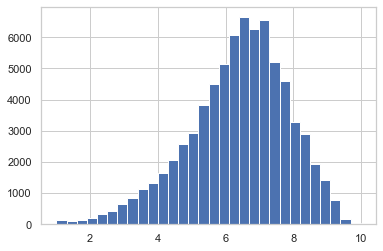

In [162]:
# histogram for ratings
movieratings_df["averagerating"].hist(bins = 30);

Acccording to the above histogram, the most frequent rating is around 6.5

To investigate further on the movie ratings lets join the movieratings dataset and the moviebasics dataset. We will join the  2 datasets whereby we will join the dataset only where the movie has a rating.

In [163]:
#merging the 2 datasets
moviesjoined_df = movieratings_df.merge(moviebasics_df, how = "inner")
moviesjoined_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


### Analysing the Joined DataFrame

### Correlation Between Average Rating and Runtime Minutes

In [164]:
df1 = moviesjoined_df[["averagerating", "runtime_minutes"]]
df1.head()

,averagerating,runtime_minutes
0,8.3,117.0
1,8.9,87.0
2,6.4,90.0
3,4.2,99.0
4,6.5,73.0


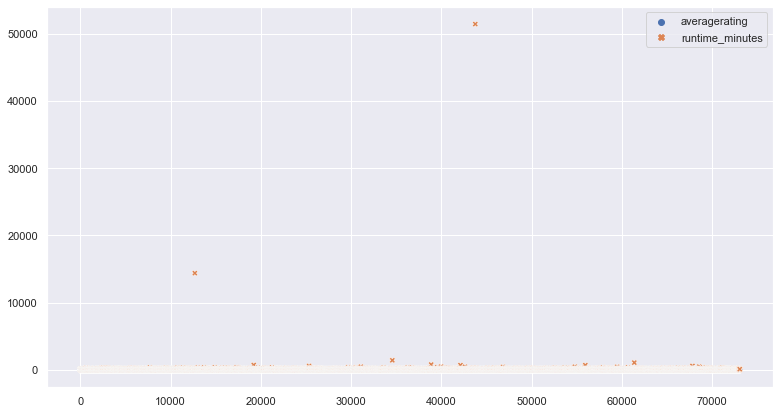

In [165]:
# correlation between rating and runtime_minutes
sns.set(style = "darkgrid")
fig, ax = plt.subplots(figsize = (13, 7))
sns.scatterplot(data = df1)
plt.show()

In [166]:
#correlation
x = df1["averagerating"]
y = df1["runtime_minutes"]
correlation = x.corr(y)
correlation

-0.006902084060072659

According to the above information, there is no correlation between the runtime minutes of a movie and the rating.

### What are the most produced genres?

C:\Users\Musoo\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


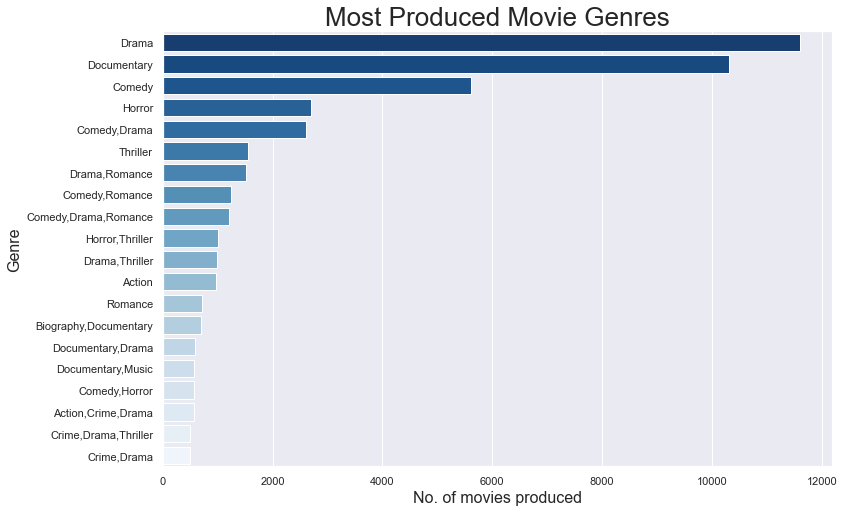

In [167]:
#top most produced genres
count = moviesjoined_df['genres'].value_counts()
count = count[:20,]
plt.figure(figsize=(12,8))
x = count.values
y = count.index
sns.barplot(x, y, orient = "h", palette = "Blues_r")
plt.title("Most Produced Movie Genres", fontsize=26)
plt.ylabel('Genre', fontsize=16)
plt.xlabel('No. of movies produced', fontsize=16) 
plt.show()

### Genres with highest rating

C:\Users\Musoo\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


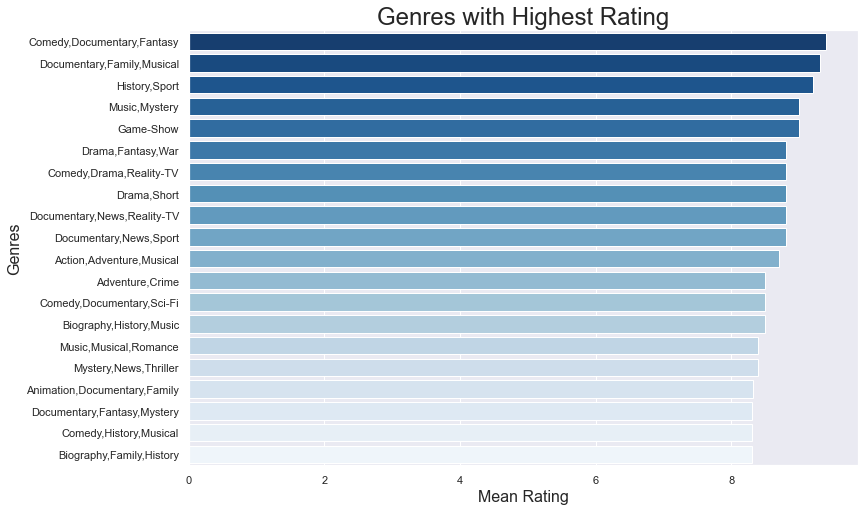

In [168]:
grouped_df = moviesjoined_df.groupby(moviesjoined_df.genres)
mean_rating = grouped_df['averagerating'].mean()
mean_rating.sort_values(ascending=False, inplace=True)
mean_rating = mean_rating[:20,]
x = mean_rating.values
y = mean_rating.index
plt.figure(figsize=(12,8))
sns.barplot(x, y, palette = "Blues_r", orient = "h")
plt.title("Genres with Highest Rating", fontsize=24)
plt.ylabel("Genres", fontsize=16)
plt.xlabel("Mean Rating", fontsize=16) 
plt.show()

To investigate on the data further, we will join the ```moviebudgets``` and ```moviesjoined_df```.

In [169]:
#preview of moviesjoined_df
moviesjoined_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [170]:
#change one of the column names to enable joining of datasets.
moviesjoined_df.rename(columns = {'original_title':'movie'}, inplace = True)
moviesjoined_df.head()

,movie_id,averagerating,numvotes,primary_title,movie,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [171]:
# extracting the columns we need from the moviesjoined_df
genres_df = moviesjoined_df[["movie", "genres"]]
genres_df.head()

,movie,genres
0,Laiye Je Yaarian,Romance
1,Borderless,Documentary
2,Just Inès,Drama
3,The Legend of Hercules,"Action,Adventure,Fantasy"
4,Até Onde?,"Mystery,Thriller"


In [172]:
# join the moviebudgets_df and genres_df
movies_and_genres = moviebudgets_df.merge(genres_df, on = "movie", how = "inner")
movies_and_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000,229024295,6.559452e+08,"Action,Adventure,Fantasy"


### Analysing the joined DataFrame

In [173]:
# adding a gross profit column
movies_and_genres["gross_profit"] = movies_and_genres["worldwide_gross"] - movies_and_genres["production_budget"]
movies_and_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,gross_profit
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,"Action,Adventure,Fantasy",6.350639e+08
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,"Action,Adventure,Sci-Fi",-2.002376e+08
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,"Action,Adventure,Sci-Fi",1.072414e+09
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,"Action,Adventure,Sci-Fi",1.748134e+09
4,9,"Nov 17, 2017",Justice League,300000000,229024295,6.559452e+08,"Action,Adventure,Fantasy",3.559452e+08


### Genres with the Highest Budget

C:\Users\Musoo\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


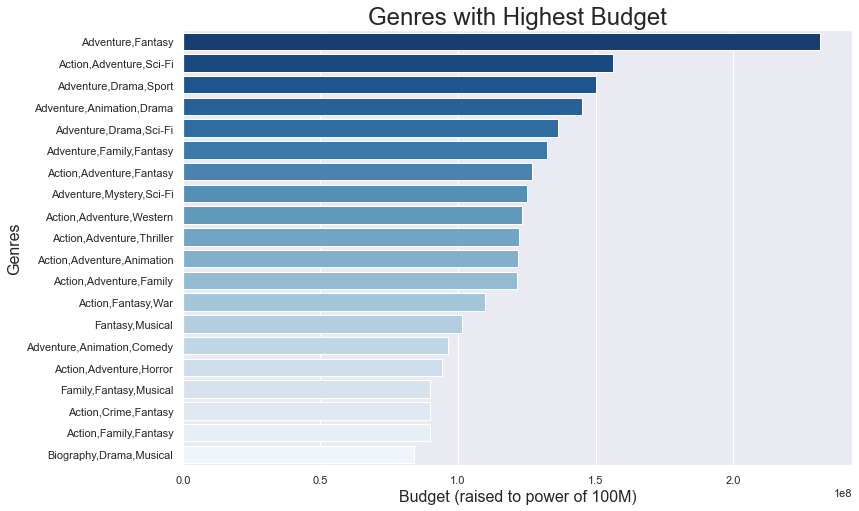

In [174]:
# budget allocated per genre
grouped_data = movies_and_genres.groupby(movies_and_genres.genres)
mean_budget = grouped_data["production_budget"].mean()
mean_budget.sort_values(ascending=False, inplace=True)
mean_budget = mean_budget[:20,]
plt.figure(figsize=(12,8))
x = mean_budget.values
y = mean_budget.index
sns.barplot(x, y, palette = "Blues_r", orient = "h")
plt.title("Genres with Highest Budget", fontsize=24)
plt.ylabel("Genres", fontsize=16)
plt.xlabel("Budget (raised to power of 100M)", fontsize=16) 
plt.show()

Now we can go ahead and check the genres with the highest gross profit.

C:\Users\Musoo\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


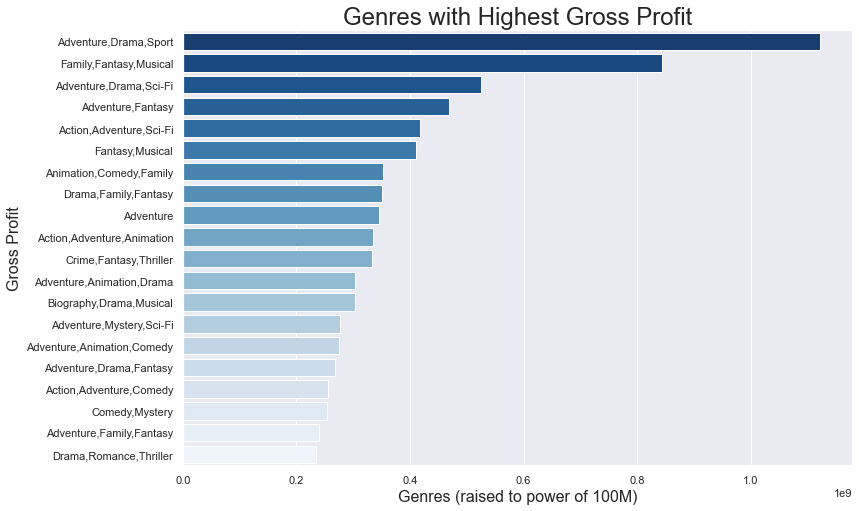

In [175]:
grouped_data = movies_and_genres.groupby(movies_and_genres.genres)
mean_profit = grouped_data["gross_profit"].mean()
mean_profit.sort_values(ascending=False, inplace=True)
mean_profit = mean_profit[:20,]
plt.figure(figsize=(12,8))
x = mean_profit.values
y = mean_profit.index
sns.barplot(x, y, palette = "Blues_r", orient = "h")
plt.title("Genres with Highest Gross Profit", fontsize=24)
plt.ylabel("Gross Profit", fontsize=16)
plt.xlabel('Genres (raised to power of 100M)', fontsize=16) 
plt.show()

### Correlation betwee budget and gross profit

In [176]:
# correlation between budget and gross profit
mean_budget = grouped_data["production_budget"].mean()
correlation = mean_profit.corr(mean_budget)
correlation

0.3450101952997223

C:\Users\Musoo\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


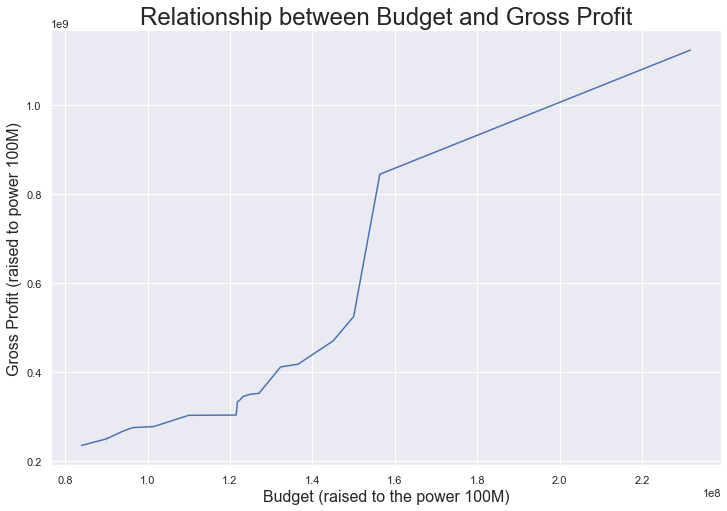

In [177]:
mean_budget = grouped_data['production_budget'].mean()
mean_budget.sort_values(ascending=False, inplace=True)
mean_budget = mean_budget[:20,]
plt.figure(figsize=(12,8))
x = mean_budget.values
y = mean_profit.values
sns.lineplot(mean_budget.values, mean_profit.values, palette = "Blues_r")
plt.title('Relationship between Budget and Gross Profit', fontsize=24)
plt.ylabel('Gross Profit (raised to power 100M)', fontsize=16)
plt.xlabel('Budget (raised to the power 100M)', fontsize=16) 
plt.show()

According to the above outputs, there is a slightly positive relationship between budget and the gross profit. The budget you allocate to the movie detremines the profit you'll get from the movie. The higher the budget, the higher the profit.

### Analysing the Box Office Dataset

### Top 20 Studios by Number of Movies Produced

C:\Users\Musoo\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


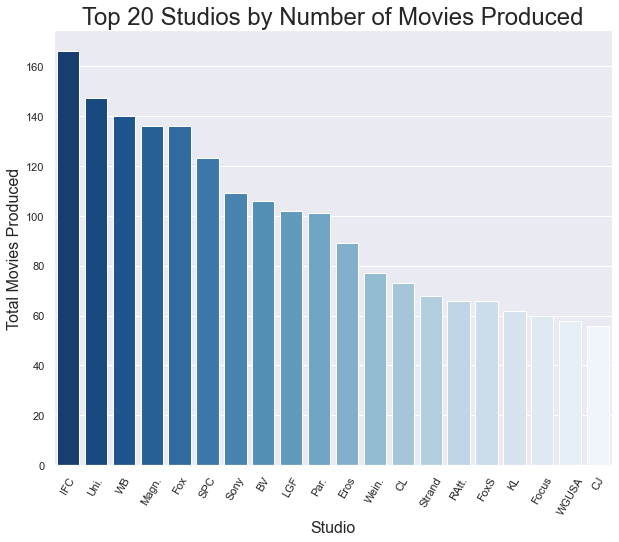

In [178]:
# Bar chart of top 20 studios by number of movies produced by the studio
count = bom_df['studio'].value_counts()
count = count[:20,]
plt.figure(figsize=(10,8))
x = count.index
y = count.values
sns.barplot(x, y, palette = "Blues_r")
plt.title('Top 20 Studios by Number of Movies Produced', fontsize = 24)
plt.ylabel('Total Movies Produced', fontsize=16)
plt.xlabel('Studio', fontsize=16) 
plt.xticks(rotation = "60")
plt.show()

### Correlation between number of movies produced and the gross income

In [179]:
# preview the bom_df again
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [180]:
# adding a column for total gross
bom_df["total_gross"] = bom_df["domestic_gross"] + bom_df["foreign_gross"]
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


C:\Users\Musoo\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


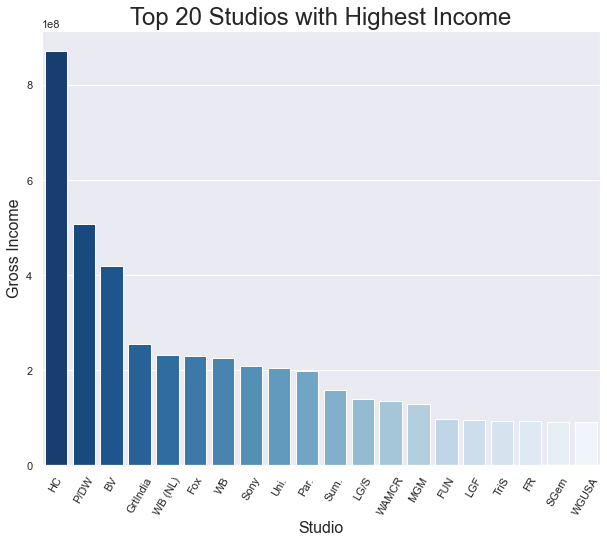

In [181]:
# bar chart of top 20 studios with the highest income
grouped_df = bom_df.groupby(["studio"])
gross_income = grouped_df['total_gross'].mean()
gross_income.sort_values(ascending=False, inplace=True)
gross_income = gross_income[:20,]
plt.figure(figsize=(10,8))
x = gross_income.index
y = gross_income.values
sns.barplot(x, y, palette = "Blues_r")
plt.title("Top 20 Studios with Highest Income", fontsize=24)
plt.ylabel("Gross Income", fontsize=16)
plt.xlabel("Studio", fontsize=16) 
plt.xticks(rotation = "60")
plt.show()

Based on the above barcharts, having a studio that produces alot of movies does not mean the studios will have the highest income. We can investigate this further by finding the correlation between the 2.

C:\Users\Musoo\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


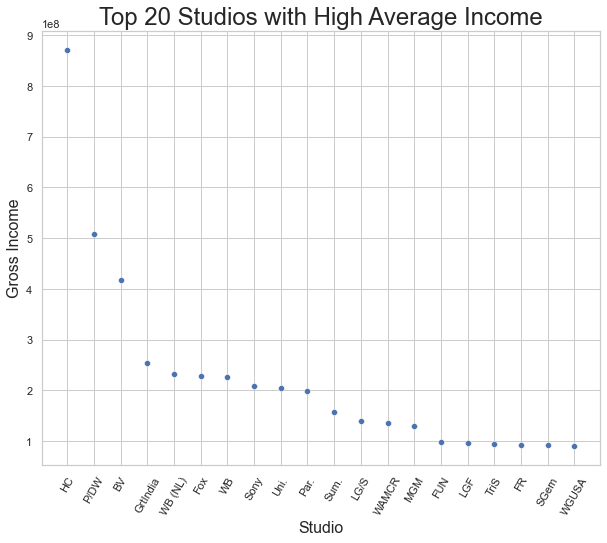

In [182]:
# correlation between gross income and number of movies produced in a studio
sns.set(style = "whitegrid")
grouped_df = bom_df.groupby(["studio"])
gross_income = grouped_df['total_gross'].mean()
gross_income.sort_values(ascending=False, inplace=True)
gross_income = gross_income[:20,]
plt.figure(figsize=(10,8))
x = gross_income.index
y = gross_income.values
sns.scatterplot(x, y)
plt.title("Top 20 Studios with High Average Income", fontsize=24)
plt.ylabel("Gross Income", fontsize=16)
plt.xlabel("Studio", fontsize=16) 
plt.xticks(rotation = "60")
plt.show()

According to the above scatterplot, there is a slightly negative correlation meaning that producing a lot of movies does not guarantee you a high gross income.

## RECOMMENDATIONS

* Microsoft should consider producing movies of genres ```'Adventure, Drama'```, ```'Comedy, Drama'``` or ```'Adventure, Comedy'```. A combination of these genres seem to have a very high rating and also have a high profit.
* Consider using a budget of over 10 million dollars. The more resources you allocate to a movie, the higher the profit.
* Microsoft should not concentrate on just producing a lot of movies because the number of movies produced by a studio does not contribute to an increase in the income of the studio. They should aim at producing the genres with a high rating as well as a high profit.